In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models,layers

In [2]:
#load the dataset
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df.shape

(17000, 9)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.skew()

longitude            -0.304003
latitude              0.471801
housing_median_age    0.064894
total_rooms           4.002730
total_bedrooms        3.322637
population            5.187212
households            3.342668
median_income         1.626693
median_house_value    0.973037
dtype: float64

In [6]:
# check for missing values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [7]:
#check for duplicate entries
df.duplicated().sum()

0

## Data Preprocessing and preparation

In [8]:
x = df.drop(columns=['median_house_value'])
y = df['median_house_value']
print(x.shape,y.shape)

(17000, 8) (17000,)


In [9]:
# train test split
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,random_state=5)
print(x.shape,xtr.shape,xts.shape)
print(y.shape,ytr.shape,yts.shape)

(17000, 8) (13600, 8) (3400, 8)
(17000,) (13600,) (3400,)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtr = scaler.fit_transform(xtr)
xts = scaler.transform(xts)

In [11]:
print(x.shape,xtr.shape,xts.shape)
print(y.shape,ytr.shape,yts.shape)

(17000, 8) (13600, 8) (3400, 8)
(17000,) (13600,) (3400,)


## Modelling the ANN

In [12]:
from tensorflow.keras import models,layers

# initializing a model
model = models.Sequential()

# add the first computational layer = hidden layer, input_shape = required for the first layer in the sequential architecture
model.add(layers.Dense(units=7,activation='relu',input_shape=(8,)))

# add the second computational layer = hidden layer
model.add(layers.Dense(units=5,activation='relu'))

# add the third computational layer = hidden layer
model.add(layers.Dense(units=2,activation='relu'))

# add the output layer
model.add(layers.Dense(units=1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 63        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [14]:
import tensorflow as tf

def getr2(y_true,y_pred):
  from tensorflow.keras import backend as b
  sse = b.sum(b.square(y_true-y_pred))
  sst = b.sum(b.square(y_true-b.mean(y_true)))
  r2 = 1 - sse/(sst + b.epsilon())
  return r2

In [15]:
# compile network - loss, optmizer, metrics
model.compile(loss='mae',optimizer='adam',metrics=[getr2])
# train the model
model.fit(xtr,ytr,batch_size=200,epochs=500,validation_data=(xts,yts),shuffle=True)

Epoch 1/500
68/68 [==============================] - 1s 4ms/step - loss: 207704.1719 - getr2: -3.2176 - val_loss: 205687.2031 - val_getr2: -3.2935
Epoch 2/500
68/68 [==============================] - 0s 2ms/step - loss: 207703.9688 - getr2: -3.2237 - val_loss: 205686.8906 - val_getr2: -3.2934
Epoch 3/500
68/68 [==============================] - 0s 2ms/step - loss: 207703.4219 - getr2: -3.2149 - val_loss: 205686.0000 - val_getr2: -3.2934
Epoch 4/500
68/68 [==============================] - 0s 2ms/step - loss: 207702.0625 - getr2: -3.2222 - val_loss: 205683.9844 - val_getr2: -3.2934
Epoch 5/500
68/68 [==============================] - 0s 2ms/step - loss: 207699.1406 - getr2: -3.2274 - val_loss: 205679.9844 - val_getr2: -3.2932
Epoch 6/500
68/68 [==============================] - 0s 2ms/step - loss: 207693.6719 - getr2: -3.2237 - val_loss: 205672.8125 - val_getr2: -3.2930
Epoch 7/500
68/68 [==============================] - 0s 1ms/step - loss: 207684.4062 - getr2: -3.2104 - val_loss: 2056

In [16]:
model.fit(xtr,ytr,batch_size=2000,epochs=500,validation_data=(xts,yts),shuffle=True)

Epoch 1/500
7/7 [==============================] - 0s 25ms/step - loss: 54667.9531 - getr2: 0.5527 - val_loss: 52962.2461 - val_getr2: 0.5619
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 54666.7383 - getr2: 0.5537 - val_loss: 52960.9883 - val_getr2: 0.5619
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 54665.4570 - getr2: 0.5519 - val_loss: 52959.6953 - val_getr2: 0.5619
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 54664.1211 - getr2: 0.5530 - val_loss: 52958.3633 - val_getr2: 0.5619
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 54662.9219 - getr2: 0.5528 - val_loss: 52956.8047 - val_getr2: 0.5619
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 54661.6797 - getr2: 0.5537 - val_loss: 52955.7266 - val_getr2: 0.5619
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 54660.2500 - getr2: 0.5535 - val_loss: 52954.3828 - val_getr2: 0.5619
Epoch 8/500


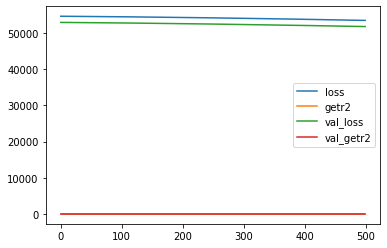

In [17]:
losses = pd.DataFrame(model.history.history)
losses.plot()

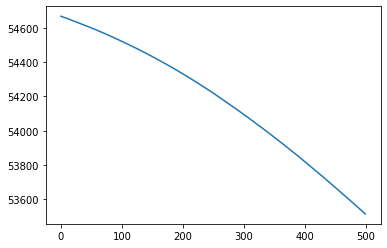

In [18]:
losses['loss'].plot()

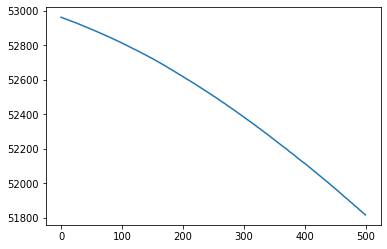

In [19]:
losses['val_loss'].plot()

In [20]:
predictions = model.predict(xts)
from sklearn import metrics

In [21]:
metrics.mean_squared_error(yts,predictions)

5506767504.487301

In [22]:
metrics.r2_score(yts,predictions)

0.576119293261689

In [23]:
metrics.r2_score(ytr,model.predict(xtr))

0.5677656997476561